In [1]:
# Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

In [2]:
# Read in the excel file 'randstad.xlsx' as a dataframe
randstad_network = pd.read_excel('Data_files/Graph_randstad.xlsx')

# Show contents of the dataframe
randstad_network

,Cities,Population,Employees,Latitude,Longitude,0,1,2,3,4,...,11,12,13,14,15,16,17,18,19,20
0,Alkmaar,111834,122.202757,52.6316,4.753400,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Almere,222825,243.484355,52.3508,5.264700,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Alphen aan de Rijn,114182,124.768454,52.1112,4.647300,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,1
3,Amersfoort,160759,175.663868,52.1561,5.387800,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Amsterdam,918117,1003.240776,52.3676,4.904100,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5,Delft,106086,115.921828,52.0116,4.357100,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
6,Den Haag,562839,615.022960,52.0705,4.300700,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
7,Dordrecht,121434,132.692827,51.8133,4.690100,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,Gouda,75316,82.298969,52.0115,4.710500,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
9,Haarlem,165396,180.730791,52.3874,4.646299,1,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0


In [3]:
# Make a graph from the dataframe
randstad_network_adjacency = randstad_network.iloc[:, 5:]
Randstad_Graph = nx.from_pandas_adjacency(randstad_network_adjacency)

In [4]:
# Giving the nodes the city names

# Getting the city names from the original dataframe
city_names = []
for city in randstad_network['Cities']:
    city_names.append(city)

# Renaming the nodes in the created graphs
for i in range(len(city_names)):
    nx.relabel_nodes(Randstad_Graph, {i: city_names[i]}, copy=False)

# Also fixing/renaming the original dataframe
for i,name in enumerate(city_names):
    randstad_network.rename(columns={i: name}, inplace=True)

# Checking whether the nodes have the desired names
print(nx.nodes(Randstad_Graph))

['Alkmaar', 'Almere', 'Alphen aan de Rijn', 'Amersfoort', 'Amsterdam', 'Delft', 'Den Haag', 'Dordrecht', 'Gouda', 'Haarlem', 'Hilversum', 'Leiden', 'Rotterdam', 'Schiphol Haarlemmermeer', 'Spijkenisse', 'Utrecht', 'Vlaardingen', 'Westland', 'Woerden', 'Zaanstad', 'Zoetermeer']


In [5]:
# Kept the shortest path in, despite having no length or time yet for each path
dsp = nx.shortest_path(Randstad_Graph, source='Amsterdam', target='Spijkenisse')
print(dsp)

['Amsterdam', 'Schiphol Haarlemmermeer', 'Alphen aan de Rijn', 'Gouda', 'Rotterdam', 'Spijkenisse']


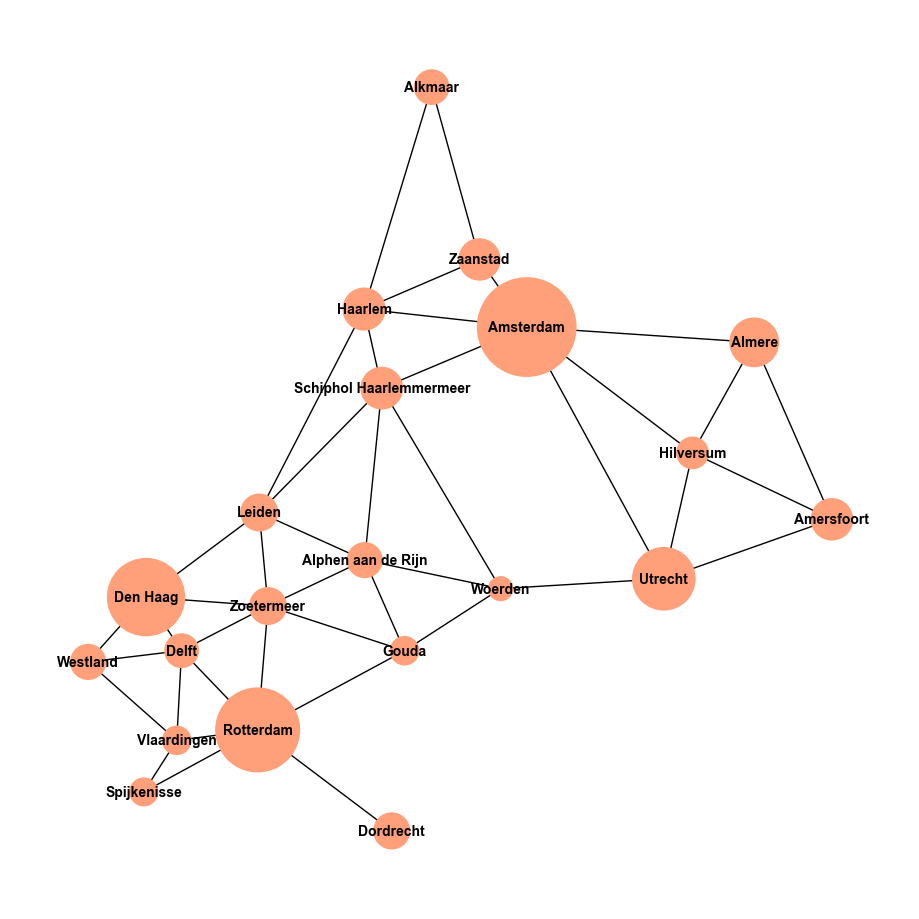

In [27]:
# Plotting the graph

# Gathering attributes for the graph
employees_attributes = []  # For node size drawing, this must be list with data ordered in the order of nodes in the graph
pos_attributes = {}

for city in Randstad_Graph.nodes():
    # The coordinates
    latitude = randstad_network.loc[randstad_network['Cities'] == city, 'Latitude'].iloc[0]
    longitude = randstad_network.loc[randstad_network['Cities'] == city, 'Longitude'].iloc[0]
    pos_attributes.update({city: (longitude, latitude)})
    
    # The employees
    employees = randstad_network.loc[randstad_network['Cities'] == city, 'Employees'].iloc[0]
    employees_attributes.append(employees)
    
    

plt.figure(figsize=(9, 9))  # Adjust the figure size as needed
nx.draw(Randstad_Graph, 
        pos=pos_attributes, 
        with_labels=True, 
        node_size=[5 * i for i in employees_attributes], 
        node_color='lightsalmon', 
        font_size=10, 
        font_color='black', 
        font_weight='bold')

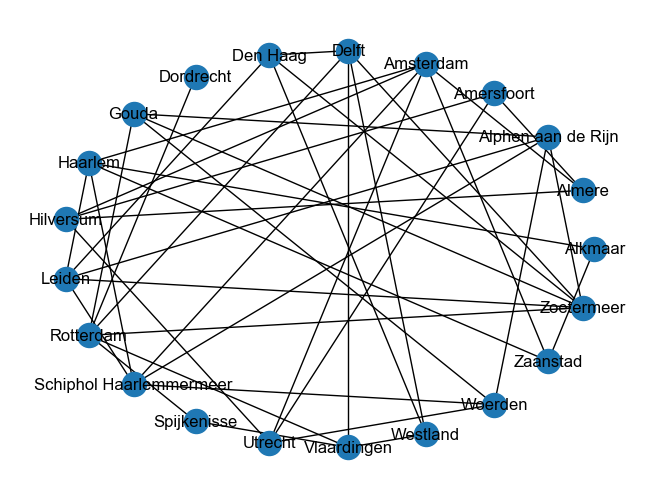

In [7]:
# Plot the graph, using a cicular layout
nx.draw_circular(Randstad_Graph, with_labels=True)

### Do note that none of the connections within our graph have either a Time or Length

Therefore the betweenness calculation might still be useful, but not yet done. We should still implement the next step of giving edges attributes before we fully can complete our first stage of analyses.



In [8]:
#Calculate the betweenness centrality, don't normalize
betweenness = nx.betweenness_centrality(Randstad_Graph,k=None,normalized=False)
betweenness

{'Alkmaar': 0.0,
 'Almere': 2.1761904761904765,
 'Alphen aan de Rijn': 14.865293040293038,
 'Amersfoort': 1.225,
 'Amsterdam': 35.265476190476186,
 'Delft': 9.1489010989011,
 'Den Haag': 17.43864468864469,
 'Dordrecht': 0.0,
 'Gouda': 29.174816849816846,
 'Haarlem': 35.84340659340659,
 'Hilversum': 3.4011904761904757,
 'Leiden': 47.78919413919414,
 'Rotterdam': 45.3793956043956,
 'Schiphol Haarlemmermeer': 25.77252747252747,
 'Spijkenisse': 0.0,
 'Utrecht': 24.48406593406593,
 'Vlaardingen': 3.5464285714285713,
 'Westland': 2.162179487179487,
 'Woerden': 32.90384615384616,
 'Zaanstad': 2.5,
 'Zoetermeer': 36.92344322344322}

C:\Users\TimEW\AppData\Local\Temp\ipykernel_11604\1611684707.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  labels_rotate = b_betw.set_xticklabels(b_betw.get_xticklabels(), rotation=90)


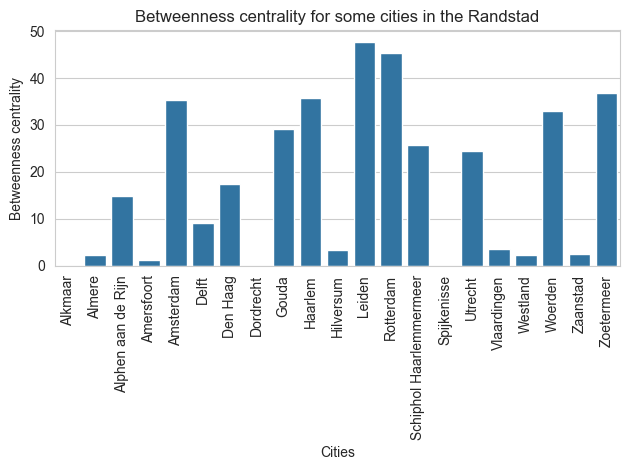

In [9]:
# Plot the values in a bar chart
b_betw = sns.barplot(betweenness)
labels_rotate = b_betw.set_xticklabels(b_betw.get_xticklabels(), rotation=90)

plt.title("Betweenness centrality for some cities in the Randstad")
plt.xlabel("Cities")
plt.ylabel("Betweenness centrality")
plt.tight_layout()

In [10]:
#Calculate the weighted edge betweenness centrality, normalize
edge_betweenness_weigthed = nx.edge_betweenness_centrality(Randstad_Graph, 
                                                             k=None, 
                                                             normalized=True, 
                                                             weight='weight', 
                                                             seed=None)
edge_betweenness_weigthed

{('Alkmaar', 'Haarlem'): 0.07857142857142858,
 ('Alkmaar', 'Zaanstad'): 0.01666666666666667,
 ('Almere', 'Amersfoort'): 0.020958049886621317,
 ('Almere', 'Amsterdam'): 0.08441043083900228,
 ('Almere', 'Hilversum'): 0.010595238095238095,
 ('Alphen aan de Rijn', 'Gouda'): 0.036613465899180186,
 ('Alphen aan de Rijn', 'Leiden'): 0.028560090702947846,
 ('Alphen aan de Rijn', 'Schiphol Haarlemmermeer'): 0.06317373103087387,
 ('Alphen aan de Rijn', 'Woerden'): 0.043441043083900226,
 ('Alphen aan de Rijn', 'Zoetermeer'): 0.06502398395255538,
 ('Amersfoort', 'Hilversum'): 0.015124716553287983,
 ('Amersfoort', 'Utrecht'): 0.0708219954648526,
 ('Amsterdam', 'Haarlem'): 0.07986656200941918,
 ('Amsterdam', 'Hilversum'): 0.05667233560090704,
 ('Amsterdam', 'Schiphol Haarlemmermeer'): 0.11372405372405373,
 ('Amsterdam', 'Utrecht'): 0.05152843188557474,
 ('Amsterdam', 'Zaanstad'): 0.04489795918367347,
 ('Delft', 'Den Haag'): 0.037121489621489624,
 ('Delft', 'Rotterdam'): 0.032959183673469394,
 ('Delf

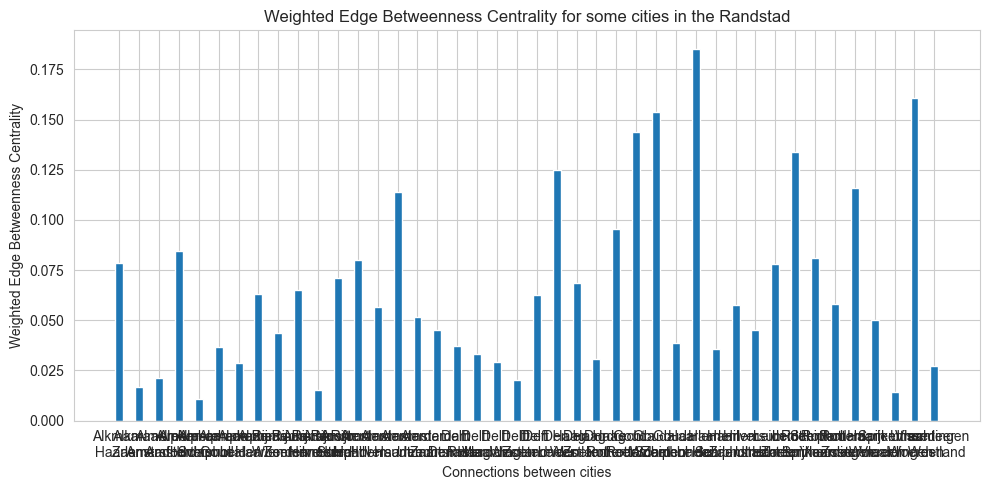

In [11]:
# Helper function for parsing the edge labels
def ppEdges (l):
    rl = []
    for i in range(len(l)):
        rl.append(str(l[i][0]) + ' \n ' + str(l[i][1]))
    return rl

# Plot the values in a bar chart
plt.figure(figsize=(10, 5))
plt.bar(range(len(edge_betweenness_weigthed)), edge_betweenness_weigthed.values(), width=0.4)
plt.xticks(range(len(edge_betweenness_weigthed)), ppEdges(list(edge_betweenness_weigthed.keys())))
plt.title("Weighted Edge Betweenness Centrality for some cities in the Randstad")
plt.xlabel("Connections between cities")
plt.ylabel("Weighted Edge Betweenness Centrality")
plt.tight_layout()

More information about Graph operations can be found in the NetworkX documentation:
https://networkx.github.io/documentation/stable/index.html

For example, this is the documentation on calculating the edge betweenness centrality:
https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html#networkx.algorithms.centrality.edge_betweenness_centrality